# Task: background correlation

> **Comments from Jay:**

I have 2 consecutive measurement
- 1st one: Air going to the instrument via column 
- 2nd one: Air directly going to the instrument 

Colum is used for the absorption of selected gas.

Now I want to do a background correlation.

Things to take care of: 

- For that, I have to take the average of columns 1st & 2nd measurements and substrate it from background 1 values.
- Time resolution is 3 sec and total measurement time for 15 min each so every 15 min there is switch in measurement b/w colume & room air

## Steps to follow

To perform the background correlation, you need to take the average of the first and second measurements from the column and subtract it from the background measurement values. Based on the information provided, here's a step-by-step approach:

- Divide the total measurement time into intervals of 15 minutes each, where there is a switch between the column and room air measurements.

- Calculate the average of the first and second measurements from the column for each 15-minute interval. Let's call this value "Avg_column".

- Subtract the "Avg_column" value from the background measurement values. Let's call the resulting values "Background_corr".

- Repeat steps 2 and 3 for each 15-minute interval throughout the entire measurement time.

## Importing the Python libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing the datafile

In [2]:
%pip install openpyxl # installing library to load Excel file in python notebook


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('Data for background correction.xlsx')

In [4]:
# lets check the column names of the dataframe
df.columns

Index(['DATE', 'TIME', 'D&T', 'H2O2', 'hocl_amp', 'H2O', 'CH4'], dtype='object')

## Data Cleaning

In [5]:
# creating a copy of the original dataset
df_copy = df.copy()

In [6]:
df_copy # checking the loaded datafile

,DATE,TIME,D&T,H2O2,hocl_amp,H2O,CH4
0,2023-03-02,20:15:02.180000,2023-03-02 14:15:02.180,-2.750070,-0.000079,0.332205,2.197728
1,2023-03-02,20:15:05.299000,2023-03-02 14:15:05.299,-2.750070,-0.000410,0.342392,2.725906
2,2023-03-02,20:15:08.424000,2023-03-02 14:15:08.424,-0.890639,-0.000410,0.342392,2.725906
3,2023-03-02,20:15:11.536000,2023-03-02 14:15:11.536,-0.890639,0.000311,0.311586,2.198759
4,2023-03-02,20:15:14.657000,2023-03-02 14:15:14.657,-3.076035,0.000311,0.311586,2.198759
...,...,...,...,...,...,...,...
140008,2023-03-07,21:46:15.398000,2023-03-07 15:46:15.398,-1.094942,0.000355,0.156824,2.209231
140009,2023-03-07,21:46:18.510000,2023-03-07 15:46:18.510,-1.094942,-0.000091,0.15717,2.244832
140010,2023-03-07,21:46:21.609000,2023-03-07 15:46:21.609,-0.769175,-0.000091,0.15717,2.244832
140011,2023-03-07,21:46:24.726000,2023-03-07 15:46:24.726,-0.769175,-0.000014,0.156463,2.327147


In [7]:
df_copy.shape # shape of the dataframe

(140013, 7)

In [8]:
# finding the empty cells and NAN values

# Assuming df is your DataFrame
empty_cells = df_copy.isnull().any()
nan_values = df_copy.isna().any()

# Printing the results
print("Empty cells:")
print(empty_cells)
print("NaN values:")
print(nan_values)

Empty cells:
DATE        False
TIME        False
D&T         False
H2O2        False
hocl_amp    False
H2O         False
CH4          True
dtype: bool
NaN values:
DATE        False
TIME        False
D&T         False
H2O2        False
hocl_amp    False
H2O         False
CH4          True
dtype: bool


In [9]:
df2 = df_copy.dropna() # removed empty rows with empty cells and NaN values

In [10]:
df2

,DATE,TIME,D&T,H2O2,hocl_amp,H2O,CH4
0,2023-03-02,20:15:02.180000,2023-03-02 14:15:02.180,-2.750070,-0.000079,0.332205,2.197728
1,2023-03-02,20:15:05.299000,2023-03-02 14:15:05.299,-2.750070,-0.000410,0.342392,2.725906
2,2023-03-02,20:15:08.424000,2023-03-02 14:15:08.424,-0.890639,-0.000410,0.342392,2.725906
3,2023-03-02,20:15:11.536000,2023-03-02 14:15:11.536,-0.890639,0.000311,0.311586,2.198759
4,2023-03-02,20:15:14.657000,2023-03-02 14:15:14.657,-3.076035,0.000311,0.311586,2.198759
...,...,...,...,...,...,...,...
140007,2023-03-07,21:46:12.298000,2023-03-07 15:46:12.298,-0.018102,0.000355,0.156824,2.209231
140008,2023-03-07,21:46:15.398000,2023-03-07 15:46:15.398,-1.094942,0.000355,0.156824,2.209231
140009,2023-03-07,21:46:18.510000,2023-03-07 15:46:18.510,-1.094942,-0.000091,0.15717,2.244832
140010,2023-03-07,21:46:21.609000,2023-03-07 15:46:21.609,-0.769175,-0.000091,0.15717,2.244832


In [11]:
df2.dtypes

DATE        datetime64[ns]
TIME                object
D&T         datetime64[ns]
H2O2               float64
hocl_amp           float64
H2O                 object
CH4                float64
dtype: object

In [12]:
df2['H2O'] = df2['H2O'].astype(float)

/var/folders/70/mjvqrvwx3bq1l13s7hb_pm4h0000gn/T/ipykernel_31198/237816827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['H2O'] = df2['H2O'].astype(float)


## Data analysis

In [13]:
# Describing the data and some statistics

df2.describe()

,H2O2,hocl_amp,H2O,CH4
count,140012.000000,140012.000000,140012.000000,140012.000000
mean,-2.355637,0.000453,0.208874,2.257854
std,1.372571,0.000465,0.085985,0.124903
min,-5.998256,-0.007944,0.095958,-1.812643
25%,-3.378703,0.000132,0.127403,2.178434
50%,-2.419287,0.000479,0.203227,2.253640
75%,-1.352456,0.000783,0.291020,2.333072
max,2.344986,0.005784,0.421304,9.296029


## Bacground correlation

To perform the background correlation based on your DataFrame df2, you can follow these steps:

### Note for the correlation calculations

#### Step -1: 

- `df2['DATE'] = pd.to_datetime(df2['DATE'])`: This line converts the 'DATE' column in the DataFrame df2 to datetime format using the pd.to_datetime function.
- `df2['TIME'] = pd.to_timedelta(df2['TIME'].astype(str))`: This line converts the 'TIME' column to timedelta format, representing the time duration, using the pd.to_timedelta function. The column values are first converted to string using astype(str) before being converted to timedelta.
- `df2['TIMESTAMP'] = pd.to_datetime(df2['DATE']) + df2['TIME'] - pd.DateOffset(hours=6)`: This line creates a new column named 'TIMESTAMP' in the DataFrame df2. It combines the date from the 'DATE' column and the time duration from the 'TIME' column to create a single datetime timestamp. Additionally, it subtracts 6 hours from the final timestamp using pd.DateOffset(hours=6).

> In the provided code, the 'TIMESTAMP' column is created by combining the 'DATE' and 'TIME' columns to form a single datetime timestamp. It represents a specific point in time, combining both the date and time components.

> The 'TIMESTAMP' column is generated by adding the 'DATE' (representing the date) and 'TIME' (representing the time duration) columns together, while subtracting 6 hours from the final timestamp. This process results in a single datetime value that represents a precise moment in time.

> By combining the date and time information into a single timestamp, it becomes easier to perform time-based operations and analysis on the data.

#### Step - 2: Resampling

- We need to take sample of 15 mints from the dataset.

    `df_resampled = df2.resample('15T').mean()` 
    
performs resampling on the DataFrame df2 with a time frequency of 15 minutes ('15T') and calculates the mean value for each resampled period.
- `resample('15T')` is a method applied to the DataFrame that performs resampling based on the specified time frequency. In this case, `15T` indicates a resampling period of 15 minutes. This means that the data will be grouped and averaged over 15-minute intervals.


#### Step -3: Correlation calculation

Create a new column in the resampled DataFrame, 'Background_corr', by subtracting the average of the first and second measurements from the 'hocl_amp' column:

- `df_resampled['Background_corr'] = df_resampled['hocl_amp'] - ((df_resampled['hocl_amp'].shift(1) + df_resampled['hocl_amp'].shift(2)) / 2)`: This line creates a new column named 'Background_corr' in the DataFrame df_resampled. It calculates the background correction by subtracting the average of the first and second measurements from the 'hocl_amp' column. The shift function is used to shift the 'hocl_amp' column by 1 and 2 positions, allowing the calculation of the average.

#### Step -3:
If needed, you can further filter the resampled DataFrame to consider only the relevant columns and drop any NaN values:

- `df_filtered = df_resampled[['hocl_amp', 'Background_corr']].dropna()`: This line creates a new DataFrame named df_filtered by selecting only the 'hocl_amp' and 'Background_corr' columns from the df_resampled DataFrame. The dropna function is then used to remove any rows containing NaN values, effectively dropping those rows from the resulting df_filtered DataFrame.

#### Step - 1: Timestamp calculations

In [14]:
# 1. Convert the 'DATE' and 'TIME' columns to a single datetime column representing the timestamp:
df2['DATE'] = pd.to_datetime(df2['DATE'])

/var/folders/70/mjvqrvwx3bq1l13s7hb_pm4h0000gn/T/ipykernel_31198/1025192739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DATE'] = pd.to_datetime(df2['DATE'])


In [15]:
df2['TIME'] = pd.to_timedelta(df2['TIME'].astype(str))
df2['TIMESTAMP'] = pd.to_datetime(df2['DATE']) + df2['TIME'] - pd.DateOffset(hours=6)

/var/folders/70/mjvqrvwx3bq1l13s7hb_pm4h0000gn/T/ipykernel_31198/2333110057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TIME'] = pd.to_timedelta(df2['TIME'].astype(str))
/var/folders/70/mjvqrvwx3bq1l13s7hb_pm4h0000gn/T/ipykernel_31198/2333110057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TIMESTAMP'] = pd.to_datetime(df2['DATE']) + df2['TIME'] - pd.DateOffset(hours=6)


In [16]:
df2.head()

,DATE,TIME,D&T,H2O2,hocl_amp,H2O,CH4,TIMESTAMP
0,2023-03-02,0 days 20:15:02.180000,2023-03-02 14:15:02.180,-2.750070,-0.000079,0.332205,2.197728,2023-03-02 14:15:02.180
1,2023-03-02,0 days 20:15:05.299000,2023-03-02 14:15:05.299,-2.750070,-0.000410,0.342392,2.725906,2023-03-02 14:15:05.299
2,2023-03-02,0 days 20:15:08.424000,2023-03-02 14:15:08.424,-0.890639,-0.000410,0.342392,2.725906,2023-03-02 14:15:08.424
3,2023-03-02,0 days 20:15:11.536000,2023-03-02 14:15:11.536,-0.890639,0.000311,0.311586,2.198759,2023-03-02 14:15:11.536
4,2023-03-02,0 days 20:15:14.657000,2023-03-02 14:15:14.657,-3.076035,0.000311,0.311586,2.198759,2023-03-02 14:15:14.657


In [17]:
# 2. Set the 'TIMESTAMP' column as the DataFrame index:
df2.set_index('TIMESTAMP', inplace=True)
df2.head()

,DATE,TIME,D&T,H2O2,hocl_amp,H2O,CH4
TIMESTAMP,,,,,,,
2023-03-02 14:15:02.180,2023-03-02,0 days 20:15:02.180000,2023-03-02 14:15:02.180,-2.750070,-0.000079,0.332205,2.197728
2023-03-02 14:15:05.299,2023-03-02,0 days 20:15:05.299000,2023-03-02 14:15:05.299,-2.750070,-0.000410,0.342392,2.725906
2023-03-02 14:15:08.424,2023-03-02,0 days 20:15:08.424000,2023-03-02 14:15:08.424,-0.890639,-0.000410,0.342392,2.725906
2023-03-02 14:15:11.536,2023-03-02,0 days 20:15:11.536000,2023-03-02 14:15:11.536,-0.890639,0.000311,0.311586,2.198759
2023-03-02 14:15:14.657,2023-03-02,0 days 20:15:14.657000,2023-03-02 14:15:14.657,-3.076035,0.000311,0.311586,2.198759


#### Step -2: Resampling `hocl_amp` and filtering

Same things can be done for `H2O2` data. To do that, just replace `H2O2` in place of `hocl_amp` below.

In [18]:
# 3. Resample the DataFrame to a 15-minute interval, taking the average of each interval:
df_resampled = df2.resample('3S').mean()

/var/folders/70/mjvqrvwx3bq1l13s7hb_pm4h0000gn/T/ipykernel_31198/1602850429.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df2.resample('3S').mean()


#### Step -3: Correlations

In [19]:
# 4. Create a new column in the resampled DataFrame, 'Background_corr', by subtracting the average of the first and second measurements from the 'hocl_amp' column:
df_resampled['Background_corr'] = df_resampled['H2O2'] - ((df_resampled['H2O2'].shift(1) + df_resampled['H2O2'].shift(2)) / 2)

In [20]:
# 5. If needed, you can further filter the resampled DataFrame to consider only the relevant columns and drop any NaN values:

df_filtered = df_resampled[['H2O2', 'Background_corr']].dropna()

Now, the `df_filtered` DataFrame will contain the 'hocl_amp' column representing the measurements and the 'Background_corr' column representing the calculated background correlation values.

In [21]:
df_filtered

,H2O2,Background_corr
TIMESTAMP,,
2023-03-02 14:15:06,-0.890639,1.859430
2023-03-02 14:15:09,-0.890639,0.929715
2023-03-02 14:15:12,-3.076035,-2.185395
2023-03-02 14:15:15,-3.076035,-1.092698
2023-03-02 14:15:18,-4.698286,-1.622251
...,...,...
2023-03-07 15:46:12,-0.018102,0.751067
2023-03-07 15:46:15,-1.094942,-1.076840
2023-03-07 15:46:18,-1.094942,-0.538420


## Visualization

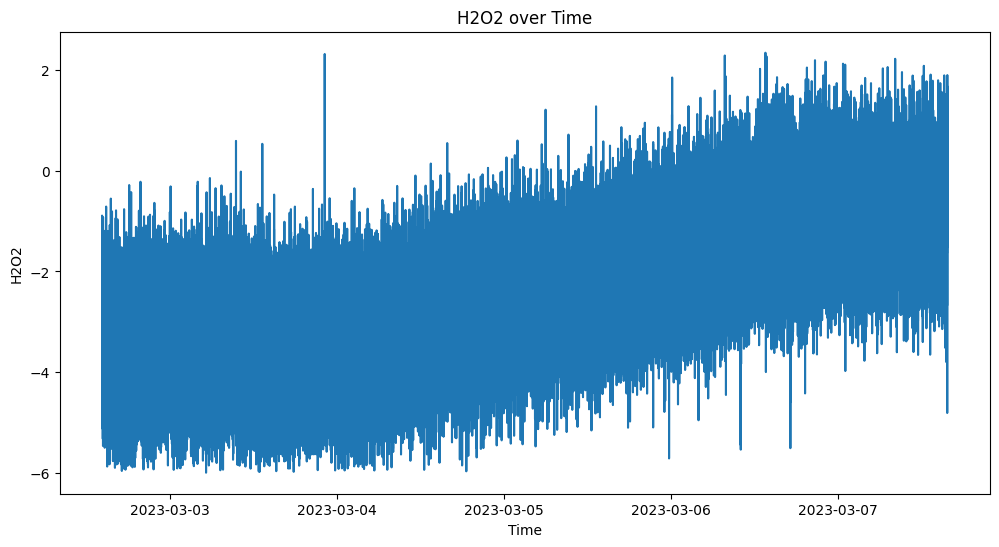

In [22]:
# 1. Line Plot of 'hocl_amp' over time:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['H2O2'])
plt.xlabel('Time')
plt.ylabel('H2O2')
plt.title('H2O2 over Time')
plt.show()

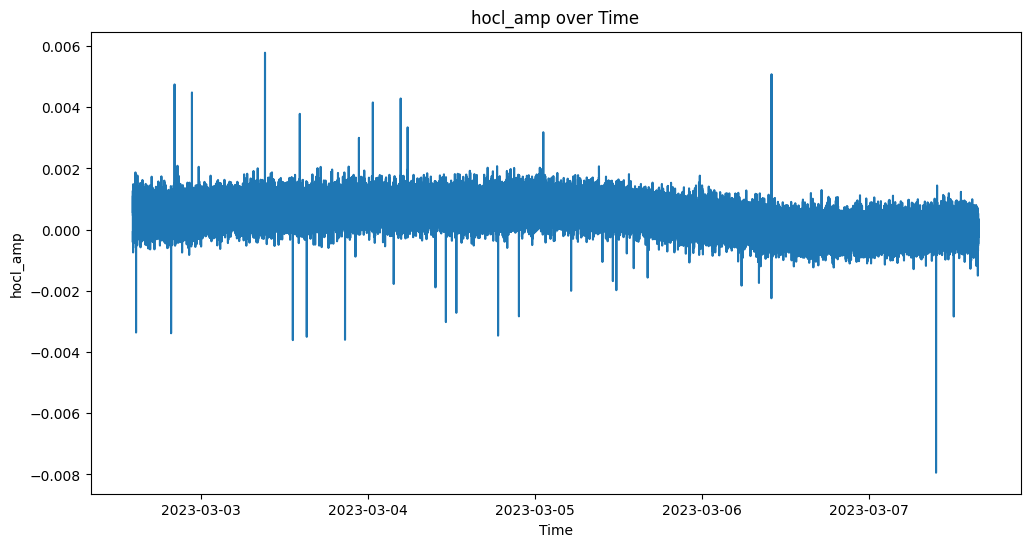

In [23]:
# 1. Line Plot of 'hocl_amp' over time:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['hocl_amp'])
plt.xlabel('Time')
plt.ylabel('hocl_amp')
plt.title('hocl_amp over Time')
plt.show()

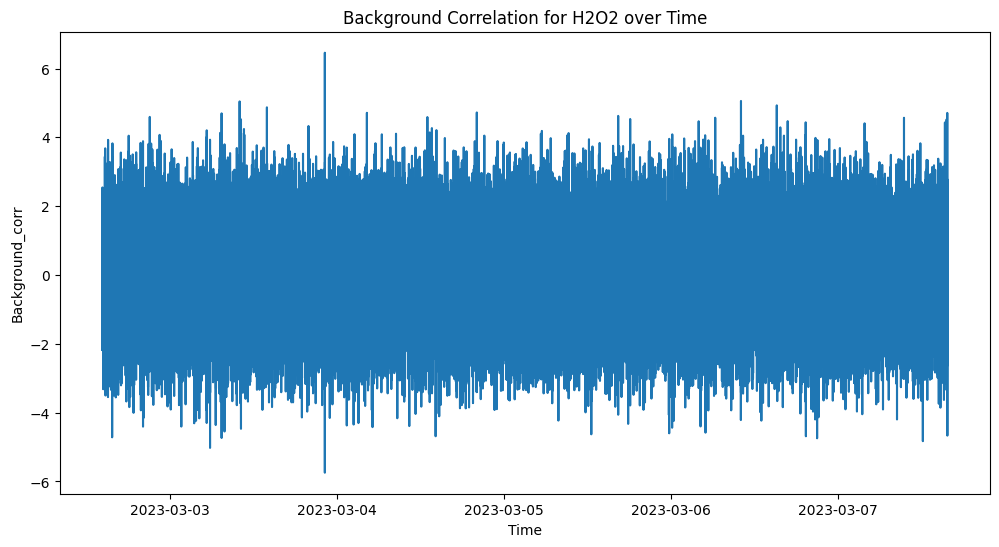

In [24]:
# 2. Line Plot of 'Background_corr' over time:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Background_corr'])
plt.xlabel('Time')
plt.ylabel('Background_corr')
plt.title('Background Correlation for H2O2 over Time')
plt.show()

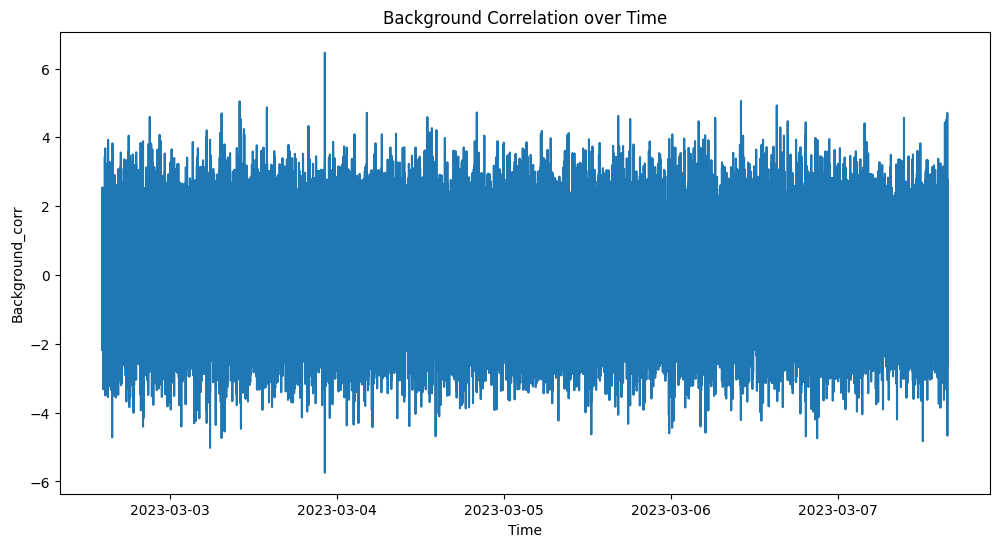

In [25]:
# 2. Line Plot of 'Background_corr' over time:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Background_corr'])
plt.xlabel('Time')
plt.ylabel('Background_corr')
plt.title('Background Correlation over Time')
plt.show()

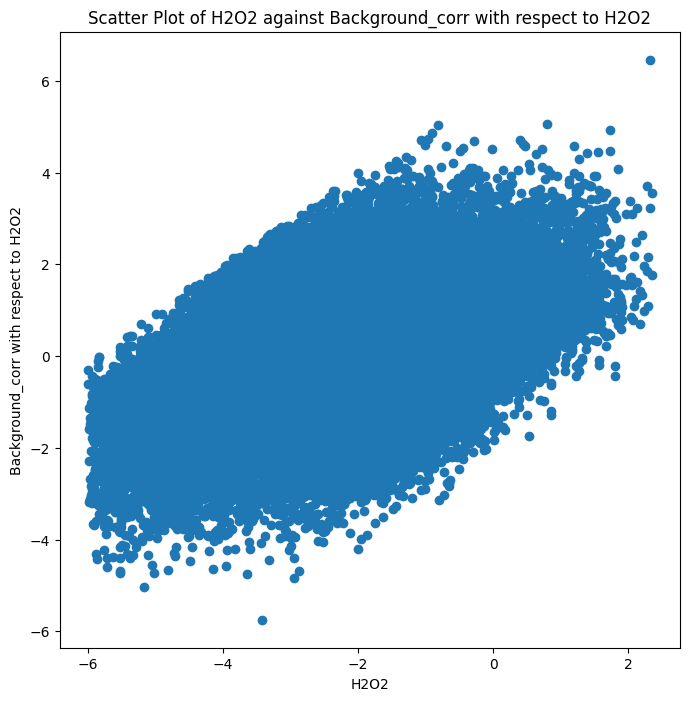

In [31]:
# 3. Scatter Plot of 'hocl_amp' against 'Background_corr':
plt.figure(figsize=(8, 8))
plt.scatter(df_filtered['H2O2'], df_filtered['Background_corr'])
plt.xlabel('H2O2')
plt.ylabel('Background_corr with respect to H2O2')
plt.title('Scatter Plot of H2O2 against Background_corr with respect to H2O2')
plt.show()

<Figure size 800x600 with 0 Axes>

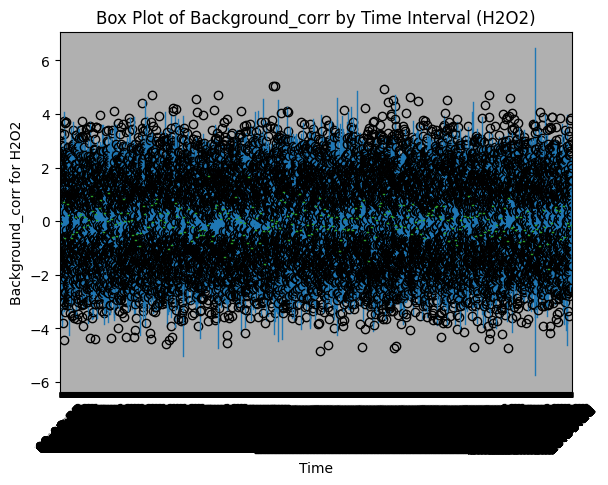

In [28]:
# 4. Box Plot of 'Background_corr' for each 15-minute interval:
df_filtered['Time'] = df_filtered.index.time

plt.figure(figsize=(8, 6))
df_filtered.boxplot(column='Background_corr', by='Time', rot=45)
plt.xlabel('Time')
plt.ylabel('Background_corr for H2O2')
plt.title('Box Plot of Background_corr by Time Interval (H2O2)')
plt.suptitle('')  
plt.show()

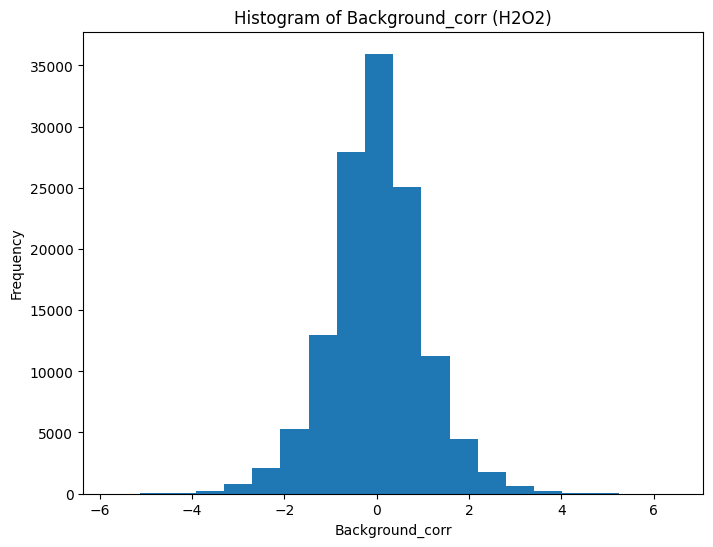

In [29]:
# 5. Histogram of 'Background_corr' distribution:
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['Background_corr'], bins=20)
plt.xlabel('Background_corr')
plt.ylabel('Frequency')
plt.title('Histogram of Background_corr (H2O2)')
plt.show()

These are just a few examples of the plots you can create based on the available data. Feel free to customize the plots according to your specific requirements and explore other visualization options provided by libraries like Matplotlib and Seaborn.

## Some other things, one can look at

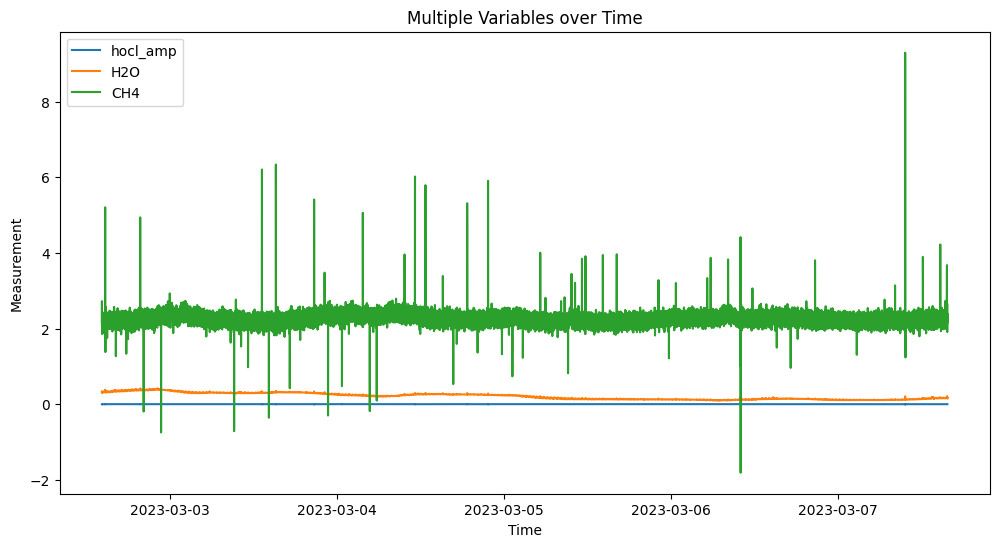

In [30]:
# 1. 
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['hocl_amp'], label='hocl_amp')
plt.plot(df2.index, df2['H2O'], label='H2O')
plt.plot(df2.index, df2['CH4'], label='CH4')
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.title('Multiple Variables over Time')
plt.legend()
plt.show()

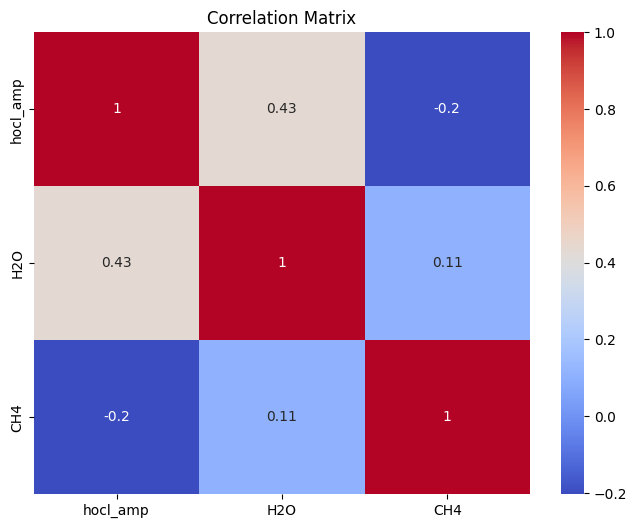

In [31]:
# 2. Heatmap of Correlation Matrix:

import seaborn as sns

corr_matrix = df2[['hocl_amp', 'H2O', 'CH4']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

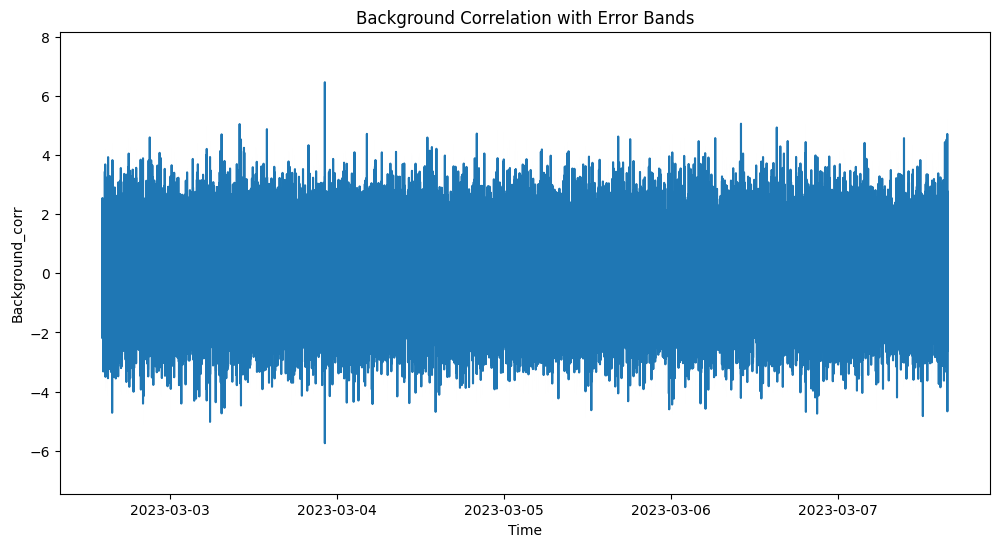

In [37]:
# 4. Line Plot with Shaded Error Bands:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Background_corr'])
plt.fill_between(df_filtered.index, df_filtered['Background_corr'] - df_filtered['Background_corr'].std(), df_filtered['Background_corr'] + df_filtered['Background_corr'].std(), alpha=0.4)
plt.xlabel('Time')
plt.ylabel('Background_corr')
plt.title('Background Correlation with Error Bands')
plt.show()

For one Hours, above plot gives

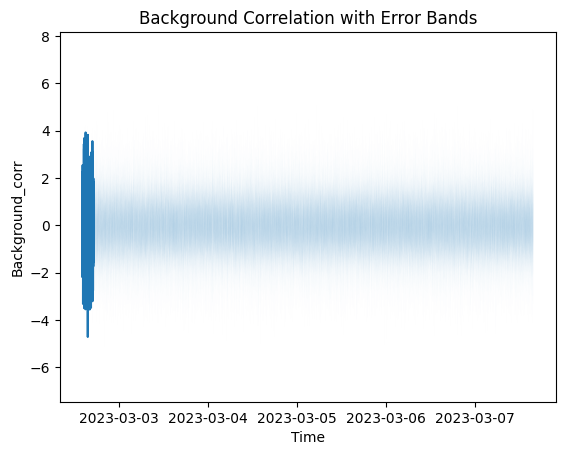

In [50]:
start_time = '2023-03-02 14:15:06'
end_time = '2023-03-02 17:15:06'
filtered_df = df_filtered.loc[start_time:end_time]

# Generate the plot
plt.plot(filtered_df.index, filtered_df['Background_corr'])

# Add error bands
plt.fill_between(df_filtered.index, df_filtered['Background_corr'] - df_filtered['Background_corr'].std(), df_filtered['Background_corr'] + df_filtered['Background_corr'].std(), alpha=0.4)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Background_corr')
plt.title('Background Correlation with Error Bands')

# Display the plot
plt.show()

/var/folders/70/mjvqrvwx3bq1l13s7hb_pm4h0000gn/T/ipykernel_31198/3644969935.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_df = filtered_df.resample('H').mean()


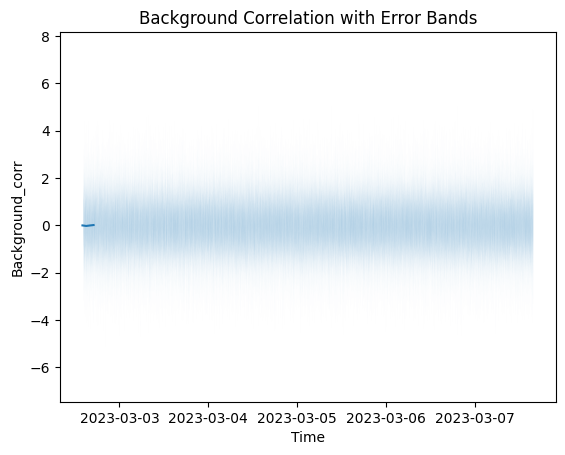

In [53]:
hourly_df = filtered_df.resample('H').mean()

# Generate the plot
plt.plot(hourly_df.index, hourly_df['Background_corr'])

# Add error bands
plt.fill_between(df_filtered.index, df_filtered['Background_corr'] - df_filtered['Background_corr'].std(), df_filtered['Background_corr'] + df_filtered['Background_corr'].std(), alpha=0.4)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Background_corr')
plt.title('Background Correlation with Error Bands')

# Display the plot
plt.show()